# Deep learning framework example: MNIST dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.


**Important**: Please see the Iris notebook example first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
import sys
import logging
from zensols.config import ExtendedInterpolationEnvConfig as AppConfig
from zensols.config import ImportConfigFactory
from zensols.deeplearn.result import ModelResultGrapher
from zensols.deeplearn import TorchConfig

# set up notebook environment
app_root_dir = '..'
sys.path.append(app_root_dir + '/src/python')
sys.path.append(app_root_dir + '/test/python')

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(app_root_dir + '/test-resources/mnist/mnist.conf',
                   env={'app_root': app_root_dir})

## Create the model facade

Create the facade with a factory, which in turn creates the executor.  The statistics on the data set that is configured on the executor is, by default, printed to standard out.  You can set the `writer` property to `None` on the facade to disable this.

In [2]:
from zensols.deeplearn.model import ModelFacade
facade = ModelFacade(config)
# configure the logging system using the facade configuration making WARNING the default (root) level
facade.configure_cli_logging(configure_level=logging.WARNING)

## Train and test the model

This trains the model on the Iris (flower) data set and prints the results.  The PyTorch model itself is also printed.

Note that in this step, all batches are loaded and logged.  This example shows that with `cache_executor` and `cache_batches` set to `True`, batches are not reloaded.  This saves time in terms of allocating, decoding and then deallocating CPU/GPU memory, especially when tuning hyperparameters and re-running for large datasets.

In [3]:
facade.train()
default_res = facade.test('Default (Adam)')

2020-07-03 20:36:08,439[INFO]:zensols.deeplearn.model.facade creating new executor


model: Mnist
feature splits:
    split stash splits:


2020-07-03 20:36:16,077[INFO]:zensols.deeplearn.batch.stash creating keys with DatasetSplitStash using batch size of 20
2020-07-03 20:36:16,078[INFO]:zensols.deeplearn.batch.stash keys for split train: 48000
2020-07-03 20:36:16,149[INFO]:zensols.deeplearn.batch.stash keys for split val: 12000
2020-07-03 20:36:16,164[INFO]:zensols.deeplearn.batch.stash keys for split test: 10000
2020-07-03 20:36:16,176[INFO]:zensols.deeplearn.batch.stash created 3500 each set limited with 9223372036854775807 with batch_limit=9223372036854775807
2020-07-03 20:36:16,198[INFO]:zensols.multi.stash spawning work with chunk size 438 across 8 workers


        train: 48000 (68.6%)
        val: 12000 (17.1%)
        test: 10000 (14.3%)
        total: 70000
    total this instance: 70000
    keys consistent: True
batch splits:
    split stash splits:
        train: 2400 (68.6%)
        val: 600 (17.1%)
        test: 500 (14.3%)
        total: 3500


2020-07-03 20:36:16,289[INFO]:zensols.multi.stash factory inst mnist_batch_dataframe_stash for chunk 0 in 0s
2020-07-03 20:36:16,291[INFO]:zensols.multi.stash processing chunk 0 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-07-03 20:36:16,292[INFO]:zensols.deeplearn.batch.stash processing: 438 data points
2020-07-03 20:36:16,293[INFO]:zensols.multi.stash factory inst mnist_batch_dataframe_stash for chunk 1 in 0s
2020-07-03 20:36:16,295[INFO]:zensols.multi.stash processing chunk 1 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-07-03 20:36:16,297[INFO]:zensols.multi.stash factory inst mnist_batch_dataframe_stash for chunk 2 in 0s
2020-07-03 20:36:16,298[INFO]:zensols.deeplearn.batch.stash processing: 438 data points
2020-07-03 20:36:16,299[INFO]:zensols.multi.stash processing chunk 2 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-07-03 20:36:16,303[INFO]:zensols.deeplearn.batch.stash processing: 438 data points
2020-07-03 20:36

2020-07-03 20:36:19,075[INFO]:zensols.deeplearn.batch.stash loaded batch 41 (train) in 0s
2020-07-03 20:36:19,077[INFO]:zensols.deeplearn.batch.stash loaded batch 42 (train) in 0s
2020-07-03 20:36:19,078[INFO]:zensols.deeplearn.batch.stash loaded batch 43 (train) in 0s
2020-07-03 20:36:19,079[INFO]:zensols.deeplearn.batch.stash loaded batch 44 (train) in 0s
2020-07-03 20:36:19,081[INFO]:zensols.deeplearn.batch.stash loaded batch 45 (train) in 0s
2020-07-03 20:36:19,082[INFO]:zensols.deeplearn.batch.stash loaded batch 46 (train) in 0s
2020-07-03 20:36:19,084[INFO]:zensols.deeplearn.batch.stash loaded batch 47 (train) in 0s
2020-07-03 20:36:19,085[INFO]:zensols.deeplearn.batch.stash loaded batch 48 (train) in 0s
2020-07-03 20:36:19,086[INFO]:zensols.deeplearn.batch.stash loaded batch 49 (train) in 0s
2020-07-03 20:36:19,088[INFO]:zensols.deeplearn.batch.stash loaded batch 50 (train) in 0s
2020-07-03 20:36:19,089[INFO]:zensols.deeplearn.batch.stash loaded batch 51 (train) in 0s
2020-07-03

2020-07-03 20:36:19,205[INFO]:zensols.deeplearn.batch.stash loaded batch 132 (train) in 0s
2020-07-03 20:36:19,207[INFO]:zensols.deeplearn.batch.stash loaded batch 133 (train) in 0s
2020-07-03 20:36:19,208[INFO]:zensols.deeplearn.batch.stash loaded batch 134 (train) in 0s
2020-07-03 20:36:19,210[INFO]:zensols.deeplearn.batch.stash loaded batch 135 (train) in 0s
2020-07-03 20:36:19,211[INFO]:zensols.deeplearn.batch.stash loaded batch 136 (train) in 0s
2020-07-03 20:36:19,213[INFO]:zensols.deeplearn.batch.stash loaded batch 137 (train) in 0s


    total this instance: 3500
    keys consistent: True


2020-07-03 20:36:19,214[INFO]:zensols.deeplearn.batch.stash loaded batch 138 (train) in 0s
2020-07-03 20:36:19,216[INFO]:zensols.deeplearn.batch.stash loaded batch 139 (train) in 0s
2020-07-03 20:36:19,217[INFO]:zensols.deeplearn.batch.stash loaded batch 140 (train) in 0s
2020-07-03 20:36:19,218[INFO]:zensols.deeplearn.batch.stash loaded batch 141 (train) in 0s
2020-07-03 20:36:19,220[INFO]:zensols.deeplearn.batch.stash loaded batch 142 (train) in 0s
2020-07-03 20:36:19,221[INFO]:zensols.deeplearn.batch.stash loaded batch 143 (train) in 0s
2020-07-03 20:36:19,223[INFO]:zensols.deeplearn.batch.stash loaded batch 144 (train) in 0s
2020-07-03 20:36:19,224[INFO]:zensols.deeplearn.batch.stash loaded batch 145 (train) in 0s
2020-07-03 20:36:19,225[INFO]:zensols.deeplearn.batch.stash loaded batch 146 (train) in 0s
2020-07-03 20:36:19,227[INFO]:zensols.deeplearn.batch.stash loaded batch 147 (train) in 0s
2020-07-03 20:36:19,228[INFO]:zensols.deeplearn.batch.stash loaded batch 148 (train) in 0s

2020-07-03 20:36:19,344[INFO]:zensols.deeplearn.batch.stash loaded batch 229 (train) in 0s
2020-07-03 20:36:19,346[INFO]:zensols.deeplearn.batch.stash loaded batch 230 (train) in 0s
2020-07-03 20:36:19,347[INFO]:zensols.deeplearn.batch.stash loaded batch 231 (train) in 0s
2020-07-03 20:36:19,349[INFO]:zensols.deeplearn.batch.stash loaded batch 232 (train) in 0s
2020-07-03 20:36:19,351[INFO]:zensols.deeplearn.batch.stash loaded batch 233 (train) in 0s
2020-07-03 20:36:19,352[INFO]:zensols.deeplearn.batch.stash loaded batch 234 (train) in 0s
2020-07-03 20:36:19,354[INFO]:zensols.deeplearn.batch.stash loaded batch 235 (train) in 0s
2020-07-03 20:36:19,355[INFO]:zensols.deeplearn.batch.stash loaded batch 236 (train) in 0s
2020-07-03 20:36:19,357[INFO]:zensols.deeplearn.batch.stash loaded batch 237 (train) in 0s
2020-07-03 20:36:19,358[INFO]:zensols.deeplearn.batch.stash loaded batch 238 (train) in 0s
2020-07-03 20:36:19,359[INFO]:zensols.deeplearn.batch.stash loaded batch 239 (train) in 0s

2020-07-03 20:36:19,478[INFO]:zensols.deeplearn.batch.stash loaded batch 320 (train) in 0s
2020-07-03 20:36:19,479[INFO]:zensols.deeplearn.batch.stash loaded batch 321 (train) in 0s
2020-07-03 20:36:19,481[INFO]:zensols.deeplearn.batch.stash loaded batch 322 (train) in 0s
2020-07-03 20:36:19,482[INFO]:zensols.deeplearn.batch.stash loaded batch 323 (train) in 0s
2020-07-03 20:36:19,483[INFO]:zensols.deeplearn.batch.stash loaded batch 324 (train) in 0s
2020-07-03 20:36:19,485[INFO]:zensols.deeplearn.batch.stash loaded batch 325 (train) in 0s
2020-07-03 20:36:19,486[INFO]:zensols.deeplearn.batch.stash loaded batch 326 (train) in 0s
2020-07-03 20:36:19,488[INFO]:zensols.deeplearn.batch.stash loaded batch 327 (train) in 0s
2020-07-03 20:36:19,489[INFO]:zensols.deeplearn.batch.stash loaded batch 328 (train) in 0s
2020-07-03 20:36:19,491[INFO]:zensols.deeplearn.batch.stash loaded batch 329 (train) in 0s
2020-07-03 20:36:19,492[INFO]:zensols.deeplearn.batch.stash loaded batch 330 (train) in 0s

2020-07-03 20:36:19,607[INFO]:zensols.deeplearn.batch.stash loaded batch 411 (train) in 0s
2020-07-03 20:36:19,609[INFO]:zensols.deeplearn.batch.stash loaded batch 412 (train) in 0s
2020-07-03 20:36:19,610[INFO]:zensols.deeplearn.batch.stash loaded batch 413 (train) in 0s
2020-07-03 20:36:19,612[INFO]:zensols.deeplearn.batch.stash loaded batch 414 (train) in 0s
2020-07-03 20:36:19,613[INFO]:zensols.deeplearn.batch.stash loaded batch 415 (train) in 0s
2020-07-03 20:36:19,614[INFO]:zensols.deeplearn.batch.stash loaded batch 416 (train) in 0s
2020-07-03 20:36:19,616[INFO]:zensols.deeplearn.batch.stash loaded batch 417 (train) in 0s
2020-07-03 20:36:19,617[INFO]:zensols.deeplearn.batch.stash loaded batch 418 (train) in 0s
2020-07-03 20:36:19,619[INFO]:zensols.deeplearn.batch.stash loaded batch 419 (train) in 0s
2020-07-03 20:36:19,620[INFO]:zensols.deeplearn.batch.stash loaded batch 420 (train) in 0s
2020-07-03 20:36:19,621[INFO]:zensols.deeplearn.batch.stash loaded batch 421 (train) in 0s

2020-07-03 20:36:19,735[INFO]:zensols.deeplearn.batch.stash loaded batch 502 (train) in 0s
2020-07-03 20:36:19,737[INFO]:zensols.deeplearn.batch.stash loaded batch 503 (train) in 0s
2020-07-03 20:36:19,738[INFO]:zensols.deeplearn.batch.stash loaded batch 504 (train) in 0s
2020-07-03 20:36:19,740[INFO]:zensols.deeplearn.batch.stash loaded batch 505 (train) in 0s
2020-07-03 20:36:19,741[INFO]:zensols.deeplearn.batch.stash loaded batch 506 (train) in 0s
2020-07-03 20:36:19,742[INFO]:zensols.deeplearn.batch.stash loaded batch 507 (train) in 0s
2020-07-03 20:36:19,744[INFO]:zensols.deeplearn.batch.stash loaded batch 508 (train) in 0s
2020-07-03 20:36:19,745[INFO]:zensols.deeplearn.batch.stash loaded batch 509 (train) in 0s
2020-07-03 20:36:19,746[INFO]:zensols.deeplearn.batch.stash loaded batch 510 (train) in 0s
2020-07-03 20:36:19,748[INFO]:zensols.deeplearn.batch.stash loaded batch 511 (train) in 0s
2020-07-03 20:36:19,749[INFO]:zensols.deeplearn.batch.stash loaded batch 512 (train) in 0s

2020-07-03 20:36:19,866[INFO]:zensols.deeplearn.batch.stash loaded batch 593 (train) in 0s
2020-07-03 20:36:19,868[INFO]:zensols.deeplearn.batch.stash loaded batch 594 (train) in 0s
2020-07-03 20:36:19,869[INFO]:zensols.deeplearn.batch.stash loaded batch 595 (train) in 0s
2020-07-03 20:36:19,871[INFO]:zensols.deeplearn.batch.stash loaded batch 596 (train) in 0s
2020-07-03 20:36:19,872[INFO]:zensols.deeplearn.batch.stash loaded batch 597 (train) in 0s
2020-07-03 20:36:19,874[INFO]:zensols.deeplearn.batch.stash loaded batch 598 (train) in 0s
2020-07-03 20:36:19,875[INFO]:zensols.deeplearn.batch.stash loaded batch 599 (train) in 0s
2020-07-03 20:36:19,876[INFO]:zensols.deeplearn.batch.stash loaded batch 600 (train) in 0s
2020-07-03 20:36:19,878[INFO]:zensols.deeplearn.batch.stash loaded batch 601 (train) in 0s
2020-07-03 20:36:19,879[INFO]:zensols.deeplearn.batch.stash loaded batch 602 (train) in 0s
2020-07-03 20:36:19,881[INFO]:zensols.deeplearn.batch.stash loaded batch 603 (train) in 0s

2020-07-03 20:36:19,995[INFO]:zensols.deeplearn.batch.stash loaded batch 684 (train) in 0s
2020-07-03 20:36:19,996[INFO]:zensols.deeplearn.batch.stash loaded batch 685 (train) in 0s
2020-07-03 20:36:19,998[INFO]:zensols.deeplearn.batch.stash loaded batch 686 (train) in 0s
2020-07-03 20:36:19,999[INFO]:zensols.deeplearn.batch.stash loaded batch 687 (train) in 0s
2020-07-03 20:36:20,001[INFO]:zensols.deeplearn.batch.stash loaded batch 688 (train) in 0s
2020-07-03 20:36:20,002[INFO]:zensols.deeplearn.batch.stash loaded batch 689 (train) in 0s
2020-07-03 20:36:20,004[INFO]:zensols.deeplearn.batch.stash loaded batch 690 (train) in 0s
2020-07-03 20:36:20,005[INFO]:zensols.deeplearn.batch.stash loaded batch 691 (train) in 0s
2020-07-03 20:36:20,006[INFO]:zensols.deeplearn.batch.stash loaded batch 692 (train) in 0s
2020-07-03 20:36:20,008[INFO]:zensols.deeplearn.batch.stash loaded batch 693 (train) in 0s
2020-07-03 20:36:20,009[INFO]:zensols.deeplearn.batch.stash loaded batch 694 (train) in 0s

2020-07-03 20:36:20,124[INFO]:zensols.deeplearn.batch.stash loaded batch 775 (train) in 0s
2020-07-03 20:36:20,126[INFO]:zensols.deeplearn.batch.stash loaded batch 776 (train) in 0s
2020-07-03 20:36:20,127[INFO]:zensols.deeplearn.batch.stash loaded batch 777 (train) in 0s
2020-07-03 20:36:20,128[INFO]:zensols.deeplearn.batch.stash loaded batch 778 (train) in 0s
2020-07-03 20:36:20,130[INFO]:zensols.deeplearn.batch.stash loaded batch 779 (train) in 0s
2020-07-03 20:36:20,131[INFO]:zensols.deeplearn.batch.stash loaded batch 780 (train) in 0s
2020-07-03 20:36:20,133[INFO]:zensols.deeplearn.batch.stash loaded batch 781 (train) in 0s
2020-07-03 20:36:20,134[INFO]:zensols.deeplearn.batch.stash loaded batch 782 (train) in 0s
2020-07-03 20:36:20,136[INFO]:zensols.deeplearn.batch.stash loaded batch 783 (train) in 0s
2020-07-03 20:36:20,137[INFO]:zensols.deeplearn.batch.stash loaded batch 784 (train) in 0s
2020-07-03 20:36:20,139[INFO]:zensols.deeplearn.batch.stash loaded batch 785 (train) in 0s

2020-07-03 20:36:20,261[INFO]:zensols.deeplearn.batch.stash loaded batch 866 (train) in 0s
2020-07-03 20:36:20,263[INFO]:zensols.deeplearn.batch.stash loaded batch 867 (train) in 0s
2020-07-03 20:36:20,265[INFO]:zensols.deeplearn.batch.stash loaded batch 868 (train) in 0s
2020-07-03 20:36:20,266[INFO]:zensols.deeplearn.batch.stash loaded batch 869 (train) in 0s
2020-07-03 20:36:20,267[INFO]:zensols.deeplearn.batch.stash loaded batch 870 (train) in 0s
2020-07-03 20:36:20,269[INFO]:zensols.deeplearn.batch.stash loaded batch 871 (train) in 0s
2020-07-03 20:36:20,270[INFO]:zensols.deeplearn.batch.stash loaded batch 872 (train) in 0s
2020-07-03 20:36:20,272[INFO]:zensols.deeplearn.batch.stash loaded batch 873 (train) in 0s
2020-07-03 20:36:20,273[INFO]:zensols.deeplearn.batch.stash loaded batch 874 (train) in 0s
2020-07-03 20:36:20,275[INFO]:zensols.deeplearn.batch.stash loaded batch 875 (train) in 0s
2020-07-03 20:36:20,276[INFO]:zensols.deeplearn.batch.stash loaded batch 876 (train) in 0s

2020-07-03 20:36:20,398[INFO]:zensols.deeplearn.batch.stash loaded batch 957 (train) in 0s
2020-07-03 20:36:20,399[INFO]:zensols.deeplearn.batch.stash loaded batch 958 (train) in 0s
2020-07-03 20:36:20,401[INFO]:zensols.deeplearn.batch.stash loaded batch 959 (train) in 0s
2020-07-03 20:36:20,402[INFO]:zensols.deeplearn.batch.stash loaded batch 960 (train) in 0s
2020-07-03 20:36:20,404[INFO]:zensols.deeplearn.batch.stash loaded batch 961 (train) in 0s
2020-07-03 20:36:20,405[INFO]:zensols.deeplearn.batch.stash loaded batch 962 (train) in 0s
2020-07-03 20:36:20,407[INFO]:zensols.deeplearn.batch.stash loaded batch 963 (train) in 0s
2020-07-03 20:36:20,408[INFO]:zensols.deeplearn.batch.stash loaded batch 964 (train) in 0s
2020-07-03 20:36:20,409[INFO]:zensols.deeplearn.batch.stash loaded batch 965 (train) in 0s
2020-07-03 20:36:20,411[INFO]:zensols.deeplearn.batch.stash loaded batch 966 (train) in 0s
2020-07-03 20:36:20,412[INFO]:zensols.deeplearn.batch.stash loaded batch 967 (train) in 0s

2020-07-03 20:36:20,533[INFO]:zensols.deeplearn.batch.stash loaded batch 1047 (train) in 0s
2020-07-03 20:36:20,534[INFO]:zensols.deeplearn.batch.stash loaded batch 1048 (train) in 0s
2020-07-03 20:36:20,536[INFO]:zensols.deeplearn.batch.stash loaded batch 1049 (train) in 0s
2020-07-03 20:36:20,537[INFO]:zensols.deeplearn.batch.stash loaded batch 1050 (train) in 0s
2020-07-03 20:36:20,539[INFO]:zensols.deeplearn.batch.stash loaded batch 1051 (train) in 0s
2020-07-03 20:36:20,540[INFO]:zensols.deeplearn.batch.stash loaded batch 1052 (train) in 0s
2020-07-03 20:36:20,542[INFO]:zensols.deeplearn.batch.stash loaded batch 1053 (train) in 0s
2020-07-03 20:36:20,543[INFO]:zensols.deeplearn.batch.stash loaded batch 1054 (train) in 0s
2020-07-03 20:36:20,544[INFO]:zensols.deeplearn.batch.stash loaded batch 1055 (train) in 0s
2020-07-03 20:36:20,546[INFO]:zensols.deeplearn.batch.stash loaded batch 1056 (train) in 0s
2020-07-03 20:36:20,547[INFO]:zensols.deeplearn.batch.stash loaded batch 1057 (t

2020-07-03 20:36:20,666[INFO]:zensols.deeplearn.batch.stash loaded batch 1137 (train) in 0s
2020-07-03 20:36:20,667[INFO]:zensols.deeplearn.batch.stash loaded batch 1138 (train) in 0s
2020-07-03 20:36:20,669[INFO]:zensols.deeplearn.batch.stash loaded batch 1139 (train) in 0s
2020-07-03 20:36:20,670[INFO]:zensols.deeplearn.batch.stash loaded batch 1140 (train) in 0s
2020-07-03 20:36:20,671[INFO]:zensols.deeplearn.batch.stash loaded batch 1141 (train) in 0s
2020-07-03 20:36:20,673[INFO]:zensols.deeplearn.batch.stash loaded batch 1142 (train) in 0s
2020-07-03 20:36:20,674[INFO]:zensols.deeplearn.batch.stash loaded batch 1143 (train) in 0s
2020-07-03 20:36:20,676[INFO]:zensols.deeplearn.batch.stash loaded batch 1144 (train) in 0s
2020-07-03 20:36:20,677[INFO]:zensols.deeplearn.batch.stash loaded batch 1145 (train) in 0s
2020-07-03 20:36:20,678[INFO]:zensols.deeplearn.batch.stash loaded batch 1146 (train) in 0s
2020-07-03 20:36:20,680[INFO]:zensols.deeplearn.batch.stash loaded batch 1147 (t

2020-07-03 20:36:20,792[INFO]:zensols.deeplearn.batch.stash loaded batch 1227 (train) in 0s
2020-07-03 20:36:20,794[INFO]:zensols.deeplearn.batch.stash loaded batch 1228 (train) in 0s
2020-07-03 20:36:20,795[INFO]:zensols.deeplearn.batch.stash loaded batch 1229 (train) in 0s
2020-07-03 20:36:20,797[INFO]:zensols.deeplearn.batch.stash loaded batch 1230 (train) in 0s
2020-07-03 20:36:20,798[INFO]:zensols.deeplearn.batch.stash loaded batch 1231 (train) in 0s
2020-07-03 20:36:20,800[INFO]:zensols.deeplearn.batch.stash loaded batch 1232 (train) in 0s
2020-07-03 20:36:20,801[INFO]:zensols.deeplearn.batch.stash loaded batch 1233 (train) in 0s
2020-07-03 20:36:20,802[INFO]:zensols.deeplearn.batch.stash loaded batch 1234 (train) in 0s
2020-07-03 20:36:20,804[INFO]:zensols.deeplearn.batch.stash loaded batch 1235 (train) in 0s
2020-07-03 20:36:20,805[INFO]:zensols.deeplearn.batch.stash loaded batch 1236 (train) in 0s
2020-07-03 20:36:20,806[INFO]:zensols.deeplearn.batch.stash loaded batch 1237 (t

2020-07-03 20:36:20,919[INFO]:zensols.deeplearn.batch.stash loaded batch 1317 (train) in 0s
2020-07-03 20:36:20,920[INFO]:zensols.deeplearn.batch.stash loaded batch 1318 (train) in 0s
2020-07-03 20:36:20,921[INFO]:zensols.deeplearn.batch.stash loaded batch 1319 (train) in 0s
2020-07-03 20:36:20,923[INFO]:zensols.deeplearn.batch.stash loaded batch 1320 (train) in 0s
2020-07-03 20:36:20,924[INFO]:zensols.deeplearn.batch.stash loaded batch 1321 (train) in 0s
2020-07-03 20:36:20,926[INFO]:zensols.deeplearn.batch.stash loaded batch 1322 (train) in 0s
2020-07-03 20:36:20,927[INFO]:zensols.deeplearn.batch.stash loaded batch 1323 (train) in 0s
2020-07-03 20:36:20,928[INFO]:zensols.deeplearn.batch.stash loaded batch 1324 (train) in 0s
2020-07-03 20:36:20,930[INFO]:zensols.deeplearn.batch.stash loaded batch 1325 (train) in 0s
2020-07-03 20:36:20,931[INFO]:zensols.deeplearn.batch.stash loaded batch 1326 (train) in 0s
2020-07-03 20:36:20,933[INFO]:zensols.deeplearn.batch.stash loaded batch 1327 (t

2020-07-03 20:36:21,045[INFO]:zensols.deeplearn.batch.stash loaded batch 1407 (train) in 0s
2020-07-03 20:36:21,046[INFO]:zensols.deeplearn.batch.stash loaded batch 1408 (train) in 0s
2020-07-03 20:36:21,048[INFO]:zensols.deeplearn.batch.stash loaded batch 1409 (train) in 0s
2020-07-03 20:36:21,049[INFO]:zensols.deeplearn.batch.stash loaded batch 1410 (train) in 0s
2020-07-03 20:36:21,050[INFO]:zensols.deeplearn.batch.stash loaded batch 1411 (train) in 0s
2020-07-03 20:36:21,052[INFO]:zensols.deeplearn.batch.stash loaded batch 1412 (train) in 0s
2020-07-03 20:36:21,053[INFO]:zensols.deeplearn.batch.stash loaded batch 1413 (train) in 0s
2020-07-03 20:36:21,054[INFO]:zensols.deeplearn.batch.stash loaded batch 1414 (train) in 0s
2020-07-03 20:36:21,056[INFO]:zensols.deeplearn.batch.stash loaded batch 1415 (train) in 0s
2020-07-03 20:36:21,057[INFO]:zensols.deeplearn.batch.stash loaded batch 1416 (train) in 0s
2020-07-03 20:36:21,058[INFO]:zensols.deeplearn.batch.stash loaded batch 1417 (t

2020-07-03 20:36:21,185[INFO]:zensols.deeplearn.batch.stash loaded batch 1497 (train) in 0s
2020-07-03 20:36:21,186[INFO]:zensols.deeplearn.batch.stash loaded batch 1498 (train) in 0s
2020-07-03 20:36:21,187[INFO]:zensols.deeplearn.batch.stash loaded batch 1499 (train) in 0s
2020-07-03 20:36:21,189[INFO]:zensols.deeplearn.batch.stash loaded batch 1500 (train) in 0s
2020-07-03 20:36:21,190[INFO]:zensols.deeplearn.batch.stash loaded batch 1501 (train) in 0s
2020-07-03 20:36:21,192[INFO]:zensols.deeplearn.batch.stash loaded batch 1502 (train) in 0s
2020-07-03 20:36:21,193[INFO]:zensols.deeplearn.batch.stash loaded batch 1503 (train) in 0s
2020-07-03 20:36:21,194[INFO]:zensols.deeplearn.batch.stash loaded batch 1504 (train) in 0s
2020-07-03 20:36:21,196[INFO]:zensols.deeplearn.batch.stash loaded batch 1505 (train) in 0s
2020-07-03 20:36:21,197[INFO]:zensols.deeplearn.batch.stash loaded batch 1506 (train) in 0s
2020-07-03 20:36:21,199[INFO]:zensols.deeplearn.batch.stash loaded batch 1507 (t

2020-07-03 20:36:21,310[INFO]:zensols.deeplearn.batch.stash loaded batch 1587 (train) in 0s
2020-07-03 20:36:21,312[INFO]:zensols.deeplearn.batch.stash loaded batch 1588 (train) in 0s
2020-07-03 20:36:21,313[INFO]:zensols.deeplearn.batch.stash loaded batch 1589 (train) in 0s
2020-07-03 20:36:21,314[INFO]:zensols.deeplearn.batch.stash loaded batch 1590 (train) in 0s
2020-07-03 20:36:21,316[INFO]:zensols.deeplearn.batch.stash loaded batch 1591 (train) in 0s
2020-07-03 20:36:21,317[INFO]:zensols.deeplearn.batch.stash loaded batch 1592 (train) in 0s
2020-07-03 20:36:21,318[INFO]:zensols.deeplearn.batch.stash loaded batch 1593 (train) in 0s
2020-07-03 20:36:21,320[INFO]:zensols.deeplearn.batch.stash loaded batch 1594 (train) in 0s
2020-07-03 20:36:21,321[INFO]:zensols.deeplearn.batch.stash loaded batch 1595 (train) in 0s
2020-07-03 20:36:21,323[INFO]:zensols.deeplearn.batch.stash loaded batch 1596 (train) in 0s
2020-07-03 20:36:21,324[INFO]:zensols.deeplearn.batch.stash loaded batch 1597 (t

2020-07-03 20:36:21,435[INFO]:zensols.deeplearn.batch.stash loaded batch 1677 (train) in 0s
2020-07-03 20:36:21,437[INFO]:zensols.deeplearn.batch.stash loaded batch 1678 (train) in 0s
2020-07-03 20:36:21,438[INFO]:zensols.deeplearn.batch.stash loaded batch 1679 (train) in 0s
2020-07-03 20:36:21,440[INFO]:zensols.deeplearn.batch.stash loaded batch 1680 (train) in 0s
2020-07-03 20:36:21,441[INFO]:zensols.deeplearn.batch.stash loaded batch 1681 (train) in 0s
2020-07-03 20:36:21,443[INFO]:zensols.deeplearn.batch.stash loaded batch 1682 (train) in 0s
2020-07-03 20:36:21,444[INFO]:zensols.deeplearn.batch.stash loaded batch 1683 (train) in 0s
2020-07-03 20:36:21,445[INFO]:zensols.deeplearn.batch.stash loaded batch 1684 (train) in 0s
2020-07-03 20:36:21,447[INFO]:zensols.deeplearn.batch.stash loaded batch 1685 (train) in 0s
2020-07-03 20:36:21,448[INFO]:zensols.deeplearn.batch.stash loaded batch 1686 (train) in 0s
2020-07-03 20:36:21,450[INFO]:zensols.deeplearn.batch.stash loaded batch 1687 (t

2020-07-03 20:36:21,560[INFO]:zensols.deeplearn.batch.stash loaded batch 1767 (train) in 0s
2020-07-03 20:36:21,562[INFO]:zensols.deeplearn.batch.stash loaded batch 1768 (train) in 0s
2020-07-03 20:36:21,563[INFO]:zensols.deeplearn.batch.stash loaded batch 1769 (train) in 0s
2020-07-03 20:36:21,564[INFO]:zensols.deeplearn.batch.stash loaded batch 1770 (train) in 0s
2020-07-03 20:36:21,566[INFO]:zensols.deeplearn.batch.stash loaded batch 1771 (train) in 0s
2020-07-03 20:36:21,567[INFO]:zensols.deeplearn.batch.stash loaded batch 1772 (train) in 0s
2020-07-03 20:36:21,568[INFO]:zensols.deeplearn.batch.stash loaded batch 1773 (train) in 0s
2020-07-03 20:36:21,570[INFO]:zensols.deeplearn.batch.stash loaded batch 1774 (train) in 0s
2020-07-03 20:36:21,571[INFO]:zensols.deeplearn.batch.stash loaded batch 1775 (train) in 0s
2020-07-03 20:36:21,573[INFO]:zensols.deeplearn.batch.stash loaded batch 1776 (train) in 0s
2020-07-03 20:36:21,574[INFO]:zensols.deeplearn.batch.stash loaded batch 1777 (t

2020-07-03 20:36:21,685[INFO]:zensols.deeplearn.batch.stash loaded batch 1857 (train) in 0s
2020-07-03 20:36:21,687[INFO]:zensols.deeplearn.batch.stash loaded batch 1858 (train) in 0s
2020-07-03 20:36:21,688[INFO]:zensols.deeplearn.batch.stash loaded batch 1859 (train) in 0s
2020-07-03 20:36:21,690[INFO]:zensols.deeplearn.batch.stash loaded batch 1860 (train) in 0s
2020-07-03 20:36:21,691[INFO]:zensols.deeplearn.batch.stash loaded batch 1861 (train) in 0s
2020-07-03 20:36:21,692[INFO]:zensols.deeplearn.batch.stash loaded batch 1862 (train) in 0s
2020-07-03 20:36:21,694[INFO]:zensols.deeplearn.batch.stash loaded batch 1863 (train) in 0s
2020-07-03 20:36:21,695[INFO]:zensols.deeplearn.batch.stash loaded batch 1864 (train) in 0s
2020-07-03 20:36:21,696[INFO]:zensols.deeplearn.batch.stash loaded batch 1865 (train) in 0s
2020-07-03 20:36:21,698[INFO]:zensols.deeplearn.batch.stash loaded batch 1866 (train) in 0s
2020-07-03 20:36:21,699[INFO]:zensols.deeplearn.batch.stash loaded batch 1867 (t

2020-07-03 20:36:21,811[INFO]:zensols.deeplearn.batch.stash loaded batch 1947 (train) in 0s
2020-07-03 20:36:21,813[INFO]:zensols.deeplearn.batch.stash loaded batch 1948 (train) in 0s
2020-07-03 20:36:21,814[INFO]:zensols.deeplearn.batch.stash loaded batch 1949 (train) in 0s
2020-07-03 20:36:21,815[INFO]:zensols.deeplearn.batch.stash loaded batch 1950 (train) in 0s
2020-07-03 20:36:21,817[INFO]:zensols.deeplearn.batch.stash loaded batch 1951 (train) in 0s
2020-07-03 20:36:21,818[INFO]:zensols.deeplearn.batch.stash loaded batch 1952 (train) in 0s
2020-07-03 20:36:21,822[INFO]:zensols.deeplearn.batch.stash loaded batch 1953 (train) in 0s
2020-07-03 20:36:21,823[INFO]:zensols.deeplearn.batch.stash loaded batch 1954 (train) in 0s
2020-07-03 20:36:21,824[INFO]:zensols.deeplearn.batch.stash loaded batch 1955 (train) in 0s
2020-07-03 20:36:21,826[INFO]:zensols.deeplearn.batch.stash loaded batch 1956 (train) in 0s
2020-07-03 20:36:21,827[INFO]:zensols.deeplearn.batch.stash loaded batch 1957 (t

2020-07-03 20:36:21,941[INFO]:zensols.deeplearn.batch.stash loaded batch 2037 (train) in 0s
2020-07-03 20:36:21,942[INFO]:zensols.deeplearn.batch.stash loaded batch 2038 (train) in 0s
2020-07-03 20:36:21,944[INFO]:zensols.deeplearn.batch.stash loaded batch 2039 (train) in 0s
2020-07-03 20:36:21,945[INFO]:zensols.deeplearn.batch.stash loaded batch 2040 (train) in 0s
2020-07-03 20:36:21,946[INFO]:zensols.deeplearn.batch.stash loaded batch 2041 (train) in 0s
2020-07-03 20:36:21,948[INFO]:zensols.deeplearn.batch.stash loaded batch 2042 (train) in 0s
2020-07-03 20:36:21,949[INFO]:zensols.deeplearn.batch.stash loaded batch 2043 (train) in 0s
2020-07-03 20:36:21,951[INFO]:zensols.deeplearn.batch.stash loaded batch 2044 (train) in 0s
2020-07-03 20:36:21,952[INFO]:zensols.deeplearn.batch.stash loaded batch 2045 (train) in 0s
2020-07-03 20:36:21,953[INFO]:zensols.deeplearn.batch.stash loaded batch 2046 (train) in 0s
2020-07-03 20:36:21,955[INFO]:zensols.deeplearn.batch.stash loaded batch 2047 (t

2020-07-03 20:36:22,073[INFO]:zensols.deeplearn.batch.stash loaded batch 2127 (train) in 0s
2020-07-03 20:36:22,075[INFO]:zensols.deeplearn.batch.stash loaded batch 2128 (train) in 0s
2020-07-03 20:36:22,076[INFO]:zensols.deeplearn.batch.stash loaded batch 2129 (train) in 0s
2020-07-03 20:36:22,077[INFO]:zensols.deeplearn.batch.stash loaded batch 2130 (train) in 0s
2020-07-03 20:36:22,079[INFO]:zensols.deeplearn.batch.stash loaded batch 2131 (train) in 0s
2020-07-03 20:36:22,080[INFO]:zensols.deeplearn.batch.stash loaded batch 2132 (train) in 0s
2020-07-03 20:36:22,082[INFO]:zensols.deeplearn.batch.stash loaded batch 2133 (train) in 0s
2020-07-03 20:36:22,083[INFO]:zensols.deeplearn.batch.stash loaded batch 2134 (train) in 0s
2020-07-03 20:36:22,085[INFO]:zensols.deeplearn.batch.stash loaded batch 2135 (train) in 0s
2020-07-03 20:36:22,087[INFO]:zensols.deeplearn.batch.stash loaded batch 2136 (train) in 0s
2020-07-03 20:36:22,089[INFO]:zensols.deeplearn.batch.stash loaded batch 2137 (t

2020-07-03 20:36:22,233[INFO]:zensols.deeplearn.batch.stash loaded batch 2217 (train) in 0s
2020-07-03 20:36:22,234[INFO]:zensols.deeplearn.batch.stash loaded batch 2218 (train) in 0s
2020-07-03 20:36:22,236[INFO]:zensols.deeplearn.batch.stash loaded batch 2219 (train) in 0s
2020-07-03 20:36:22,238[INFO]:zensols.deeplearn.batch.stash loaded batch 2220 (train) in 0s
2020-07-03 20:36:22,240[INFO]:zensols.deeplearn.batch.stash loaded batch 2221 (train) in 0s
2020-07-03 20:36:22,241[INFO]:zensols.deeplearn.batch.stash loaded batch 2222 (train) in 0s
2020-07-03 20:36:22,243[INFO]:zensols.deeplearn.batch.stash loaded batch 2223 (train) in 0s
2020-07-03 20:36:22,245[INFO]:zensols.deeplearn.batch.stash loaded batch 2224 (train) in 0s
2020-07-03 20:36:22,247[INFO]:zensols.deeplearn.batch.stash loaded batch 2225 (train) in 0s
2020-07-03 20:36:22,248[INFO]:zensols.deeplearn.batch.stash loaded batch 2226 (train) in 0s
2020-07-03 20:36:22,250[INFO]:zensols.deeplearn.batch.stash loaded batch 2227 (t

2020-07-03 20:36:22,375[INFO]:zensols.deeplearn.batch.stash loaded batch 2307 (train) in 0s
2020-07-03 20:36:22,376[INFO]:zensols.deeplearn.batch.stash loaded batch 2308 (train) in 0s
2020-07-03 20:36:22,377[INFO]:zensols.deeplearn.batch.stash loaded batch 2309 (train) in 0s
2020-07-03 20:36:22,379[INFO]:zensols.deeplearn.batch.stash loaded batch 2310 (train) in 0s
2020-07-03 20:36:22,380[INFO]:zensols.deeplearn.batch.stash loaded batch 2311 (train) in 0s
2020-07-03 20:36:22,382[INFO]:zensols.deeplearn.batch.stash loaded batch 2312 (train) in 0s
2020-07-03 20:36:22,383[INFO]:zensols.deeplearn.batch.stash loaded batch 2313 (train) in 0s
2020-07-03 20:36:22,384[INFO]:zensols.deeplearn.batch.stash loaded batch 2314 (train) in 0s
2020-07-03 20:36:22,386[INFO]:zensols.deeplearn.batch.stash loaded batch 2315 (train) in 0s
2020-07-03 20:36:22,387[INFO]:zensols.deeplearn.batch.stash loaded batch 2316 (train) in 0s
2020-07-03 20:36:22,389[INFO]:zensols.deeplearn.batch.stash loaded batch 2317 (t

2020-07-03 20:36:22,501[INFO]:zensols.deeplearn.batch.stash loaded batch 2397 (train) in 0s
2020-07-03 20:36:22,503[INFO]:zensols.deeplearn.batch.stash loaded batch 2398 (train) in 0s
2020-07-03 20:36:22,504[INFO]:zensols.deeplearn.batch.stash loaded batch 2399 (train) in 0s
2020-07-03 20:36:25,167[INFO]:zensols.deeplearn.batch.stash loaded batch 2400 (val) in 0s
2020-07-03 20:36:25,169[INFO]:zensols.deeplearn.batch.stash loaded batch 2401 (val) in 0s
2020-07-03 20:36:25,170[INFO]:zensols.deeplearn.batch.stash loaded batch 2402 (val) in 0s
2020-07-03 20:36:25,172[INFO]:zensols.deeplearn.batch.stash loaded batch 2403 (val) in 0s
2020-07-03 20:36:25,173[INFO]:zensols.deeplearn.batch.stash loaded batch 2404 (val) in 0s
2020-07-03 20:36:25,175[INFO]:zensols.deeplearn.batch.stash loaded batch 2405 (val) in 0s
2020-07-03 20:36:25,176[INFO]:zensols.deeplearn.batch.stash loaded batch 2406 (val) in 0s
2020-07-03 20:36:25,177[INFO]:zensols.deeplearn.batch.stash loaded batch 2407 (val) in 0s
2020

2020-07-03 20:36:25,300[INFO]:zensols.deeplearn.batch.stash loaded batch 2488 (val) in 0s
2020-07-03 20:36:25,302[INFO]:zensols.deeplearn.batch.stash loaded batch 2489 (val) in 0s
2020-07-03 20:36:25,303[INFO]:zensols.deeplearn.batch.stash loaded batch 2490 (val) in 0s
2020-07-03 20:36:25,305[INFO]:zensols.deeplearn.batch.stash loaded batch 2491 (val) in 0s
2020-07-03 20:36:25,306[INFO]:zensols.deeplearn.batch.stash loaded batch 2492 (val) in 0s
2020-07-03 20:36:25,308[INFO]:zensols.deeplearn.batch.stash loaded batch 2493 (val) in 0s
2020-07-03 20:36:25,309[INFO]:zensols.deeplearn.batch.stash loaded batch 2494 (val) in 0s
2020-07-03 20:36:25,310[INFO]:zensols.deeplearn.batch.stash loaded batch 2495 (val) in 0s
2020-07-03 20:36:25,312[INFO]:zensols.deeplearn.batch.stash loaded batch 2496 (val) in 0s
2020-07-03 20:36:25,313[INFO]:zensols.deeplearn.batch.stash loaded batch 2497 (val) in 0s
2020-07-03 20:36:25,315[INFO]:zensols.deeplearn.batch.stash loaded batch 2498 (val) in 0s
2020-07-03

2020-07-03 20:36:25,450[INFO]:zensols.deeplearn.batch.stash loaded batch 2580 (val) in 0s
2020-07-03 20:36:25,451[INFO]:zensols.deeplearn.batch.stash loaded batch 2581 (val) in 0s
2020-07-03 20:36:25,453[INFO]:zensols.deeplearn.batch.stash loaded batch 2582 (val) in 0s
2020-07-03 20:36:25,454[INFO]:zensols.deeplearn.batch.stash loaded batch 2583 (val) in 0s
2020-07-03 20:36:25,456[INFO]:zensols.deeplearn.batch.stash loaded batch 2584 (val) in 0s
2020-07-03 20:36:25,457[INFO]:zensols.deeplearn.batch.stash loaded batch 2585 (val) in 0s
2020-07-03 20:36:25,459[INFO]:zensols.deeplearn.batch.stash loaded batch 2586 (val) in 0s
2020-07-03 20:36:25,460[INFO]:zensols.deeplearn.batch.stash loaded batch 2587 (val) in 0s
2020-07-03 20:36:25,461[INFO]:zensols.deeplearn.batch.stash loaded batch 2588 (val) in 0s
2020-07-03 20:36:25,463[INFO]:zensols.deeplearn.batch.stash loaded batch 2589 (val) in 0s
2020-07-03 20:36:25,464[INFO]:zensols.deeplearn.batch.stash loaded batch 2590 (val) in 0s
2020-07-03

2020-07-03 20:36:25,581[INFO]:zensols.deeplearn.batch.stash loaded batch 2672 (val) in 0s
2020-07-03 20:36:25,582[INFO]:zensols.deeplearn.batch.stash loaded batch 2673 (val) in 0s
2020-07-03 20:36:25,583[INFO]:zensols.deeplearn.batch.stash loaded batch 2674 (val) in 0s
2020-07-03 20:36:25,585[INFO]:zensols.deeplearn.batch.stash loaded batch 2675 (val) in 0s
2020-07-03 20:36:25,586[INFO]:zensols.deeplearn.batch.stash loaded batch 2676 (val) in 0s
2020-07-03 20:36:25,588[INFO]:zensols.deeplearn.batch.stash loaded batch 2677 (val) in 0s
2020-07-03 20:36:25,589[INFO]:zensols.deeplearn.batch.stash loaded batch 2678 (val) in 0s
2020-07-03 20:36:25,591[INFO]:zensols.deeplearn.batch.stash loaded batch 2679 (val) in 0s
2020-07-03 20:36:25,592[INFO]:zensols.deeplearn.batch.stash loaded batch 2680 (val) in 0s
2020-07-03 20:36:25,594[INFO]:zensols.deeplearn.batch.stash loaded batch 2681 (val) in 0s
2020-07-03 20:36:25,595[INFO]:zensols.deeplearn.batch.stash loaded batch 2682 (val) in 0s
2020-07-03

2020-07-03 20:36:25,712[INFO]:zensols.deeplearn.batch.stash loaded batch 2764 (val) in 0s
2020-07-03 20:36:25,714[INFO]:zensols.deeplearn.batch.stash loaded batch 2765 (val) in 0s
2020-07-03 20:36:25,715[INFO]:zensols.deeplearn.batch.stash loaded batch 2766 (val) in 0s
2020-07-03 20:36:25,717[INFO]:zensols.deeplearn.batch.stash loaded batch 2767 (val) in 0s
2020-07-03 20:36:25,718[INFO]:zensols.deeplearn.batch.stash loaded batch 2768 (val) in 0s
2020-07-03 20:36:25,720[INFO]:zensols.deeplearn.batch.stash loaded batch 2769 (val) in 0s
2020-07-03 20:36:25,721[INFO]:zensols.deeplearn.batch.stash loaded batch 2770 (val) in 0s
2020-07-03 20:36:25,722[INFO]:zensols.deeplearn.batch.stash loaded batch 2771 (val) in 0s
2020-07-03 20:36:25,724[INFO]:zensols.deeplearn.batch.stash loaded batch 2772 (val) in 0s
2020-07-03 20:36:25,725[INFO]:zensols.deeplearn.batch.stash loaded batch 2773 (val) in 0s
2020-07-03 20:36:25,727[INFO]:zensols.deeplearn.batch.stash loaded batch 2774 (val) in 0s
2020-07-03

2020-07-03 20:36:25,845[INFO]:zensols.deeplearn.batch.stash loaded batch 2856 (val) in 0s
2020-07-03 20:36:25,846[INFO]:zensols.deeplearn.batch.stash loaded batch 2857 (val) in 0s
2020-07-03 20:36:25,848[INFO]:zensols.deeplearn.batch.stash loaded batch 2858 (val) in 0s
2020-07-03 20:36:25,849[INFO]:zensols.deeplearn.batch.stash loaded batch 2859 (val) in 0s
2020-07-03 20:36:25,850[INFO]:zensols.deeplearn.batch.stash loaded batch 2860 (val) in 0s
2020-07-03 20:36:25,852[INFO]:zensols.deeplearn.batch.stash loaded batch 2861 (val) in 0s
2020-07-03 20:36:25,853[INFO]:zensols.deeplearn.batch.stash loaded batch 2862 (val) in 0s
2020-07-03 20:36:25,855[INFO]:zensols.deeplearn.batch.stash loaded batch 2863 (val) in 0s
2020-07-03 20:36:25,856[INFO]:zensols.deeplearn.batch.stash loaded batch 2864 (val) in 0s
2020-07-03 20:36:25,858[INFO]:zensols.deeplearn.batch.stash loaded batch 2865 (val) in 0s
2020-07-03 20:36:25,859[INFO]:zensols.deeplearn.batch.stash loaded batch 2866 (val) in 0s
2020-07-03

2020-07-03 20:36:25,976[INFO]:zensols.deeplearn.batch.stash loaded batch 2948 (val) in 0s
2020-07-03 20:36:25,978[INFO]:zensols.deeplearn.batch.stash loaded batch 2949 (val) in 0s
2020-07-03 20:36:25,979[INFO]:zensols.deeplearn.batch.stash loaded batch 2950 (val) in 0s
2020-07-03 20:36:25,981[INFO]:zensols.deeplearn.batch.stash loaded batch 2951 (val) in 0s
2020-07-03 20:36:25,982[INFO]:zensols.deeplearn.batch.stash loaded batch 2952 (val) in 0s
2020-07-03 20:36:25,983[INFO]:zensols.deeplearn.batch.stash loaded batch 2953 (val) in 0s
2020-07-03 20:36:25,985[INFO]:zensols.deeplearn.batch.stash loaded batch 2954 (val) in 0s
2020-07-03 20:36:25,986[INFO]:zensols.deeplearn.batch.stash loaded batch 2955 (val) in 0s
2020-07-03 20:36:25,988[INFO]:zensols.deeplearn.batch.stash loaded batch 2956 (val) in 0s
2020-07-03 20:36:25,989[INFO]:zensols.deeplearn.batch.stash loaded batch 2957 (val) in 0s
2020-07-03 20:36:25,991[INFO]:zensols.deeplearn.batch.stash loaded batch 2958 (val) in 0s
2020-07-03

2020-07-03 20:39:26,531[INFO]:zensols.deeplearn.batch.stash loaded batch 3036 (test) in 0s
2020-07-03 20:39:26,533[INFO]:zensols.deeplearn.batch.stash loaded batch 3037 (test) in 0s
2020-07-03 20:39:26,534[INFO]:zensols.deeplearn.batch.stash loaded batch 3038 (test) in 0s
2020-07-03 20:39:26,536[INFO]:zensols.deeplearn.batch.stash loaded batch 3039 (test) in 0s
2020-07-03 20:39:26,537[INFO]:zensols.deeplearn.batch.stash loaded batch 3040 (test) in 0s
2020-07-03 20:39:26,539[INFO]:zensols.deeplearn.batch.stash loaded batch 3041 (test) in 0s
2020-07-03 20:39:26,541[INFO]:zensols.deeplearn.batch.stash loaded batch 3042 (test) in 0s
2020-07-03 20:39:26,542[INFO]:zensols.deeplearn.batch.stash loaded batch 3043 (test) in 0s
2020-07-03 20:39:26,544[INFO]:zensols.deeplearn.batch.stash loaded batch 3044 (test) in 0s
2020-07-03 20:39:26,545[INFO]:zensols.deeplearn.batch.stash loaded batch 3045 (test) in 0s
2020-07-03 20:39:26,547[INFO]:zensols.deeplearn.batch.stash loaded batch 3046 (test) in 0s

2020-07-03 20:39:26,668[INFO]:zensols.deeplearn.batch.stash loaded batch 3127 (test) in 0s
2020-07-03 20:39:26,669[INFO]:zensols.deeplearn.batch.stash loaded batch 3128 (test) in 0s
2020-07-03 20:39:26,670[INFO]:zensols.deeplearn.batch.stash loaded batch 3129 (test) in 0s
2020-07-03 20:39:26,672[INFO]:zensols.deeplearn.batch.stash loaded batch 3130 (test) in 0s
2020-07-03 20:39:26,673[INFO]:zensols.deeplearn.batch.stash loaded batch 3131 (test) in 0s
2020-07-03 20:39:26,675[INFO]:zensols.deeplearn.batch.stash loaded batch 3132 (test) in 0s
2020-07-03 20:39:26,676[INFO]:zensols.deeplearn.batch.stash loaded batch 3133 (test) in 0s
2020-07-03 20:39:26,677[INFO]:zensols.deeplearn.batch.stash loaded batch 3134 (test) in 0s
2020-07-03 20:39:26,679[INFO]:zensols.deeplearn.batch.stash loaded batch 3135 (test) in 0s
2020-07-03 20:39:26,680[INFO]:zensols.deeplearn.batch.stash loaded batch 3136 (test) in 0s
2020-07-03 20:39:26,682[INFO]:zensols.deeplearn.batch.stash loaded batch 3137 (test) in 0s

2020-07-03 20:39:26,798[INFO]:zensols.deeplearn.batch.stash loaded batch 3218 (test) in 0s
2020-07-03 20:39:26,799[INFO]:zensols.deeplearn.batch.stash loaded batch 3219 (test) in 0s
2020-07-03 20:39:26,800[INFO]:zensols.deeplearn.batch.stash loaded batch 3220 (test) in 0s
2020-07-03 20:39:26,802[INFO]:zensols.deeplearn.batch.stash loaded batch 3221 (test) in 0s
2020-07-03 20:39:26,803[INFO]:zensols.deeplearn.batch.stash loaded batch 3222 (test) in 0s
2020-07-03 20:39:26,805[INFO]:zensols.deeplearn.batch.stash loaded batch 3223 (test) in 0s
2020-07-03 20:39:26,806[INFO]:zensols.deeplearn.batch.stash loaded batch 3224 (test) in 0s
2020-07-03 20:39:26,807[INFO]:zensols.deeplearn.batch.stash loaded batch 3225 (test) in 0s
2020-07-03 20:39:26,809[INFO]:zensols.deeplearn.batch.stash loaded batch 3226 (test) in 0s
2020-07-03 20:39:26,810[INFO]:zensols.deeplearn.batch.stash loaded batch 3227 (test) in 0s
2020-07-03 20:39:26,812[INFO]:zensols.deeplearn.batch.stash loaded batch 3228 (test) in 0s

2020-07-03 20:39:26,924[INFO]:zensols.deeplearn.batch.stash loaded batch 3309 (test) in 0s
2020-07-03 20:39:26,926[INFO]:zensols.deeplearn.batch.stash loaded batch 3310 (test) in 0s
2020-07-03 20:39:26,927[INFO]:zensols.deeplearn.batch.stash loaded batch 3311 (test) in 0s
2020-07-03 20:39:26,929[INFO]:zensols.deeplearn.batch.stash loaded batch 3312 (test) in 0s
2020-07-03 20:39:26,930[INFO]:zensols.deeplearn.batch.stash loaded batch 3313 (test) in 0s
2020-07-03 20:39:26,931[INFO]:zensols.deeplearn.batch.stash loaded batch 3314 (test) in 0s
2020-07-03 20:39:26,933[INFO]:zensols.deeplearn.batch.stash loaded batch 3315 (test) in 0s
2020-07-03 20:39:26,934[INFO]:zensols.deeplearn.batch.stash loaded batch 3316 (test) in 0s
2020-07-03 20:39:26,936[INFO]:zensols.deeplearn.batch.stash loaded batch 3317 (test) in 0s
2020-07-03 20:39:26,937[INFO]:zensols.deeplearn.batch.stash loaded batch 3318 (test) in 0s
2020-07-03 20:39:26,938[INFO]:zensols.deeplearn.batch.stash loaded batch 3319 (test) in 0s

2020-07-03 20:39:27,054[INFO]:zensols.deeplearn.batch.stash loaded batch 3400 (test) in 0s
2020-07-03 20:39:27,055[INFO]:zensols.deeplearn.batch.stash loaded batch 3401 (test) in 0s
2020-07-03 20:39:27,056[INFO]:zensols.deeplearn.batch.stash loaded batch 3402 (test) in 0s
2020-07-03 20:39:27,058[INFO]:zensols.deeplearn.batch.stash loaded batch 3403 (test) in 0s
2020-07-03 20:39:27,059[INFO]:zensols.deeplearn.batch.stash loaded batch 3404 (test) in 0s
2020-07-03 20:39:27,060[INFO]:zensols.deeplearn.batch.stash loaded batch 3405 (test) in 0s
2020-07-03 20:39:27,062[INFO]:zensols.deeplearn.batch.stash loaded batch 3406 (test) in 0s
2020-07-03 20:39:27,063[INFO]:zensols.deeplearn.batch.stash loaded batch 3407 (test) in 0s
2020-07-03 20:39:27,065[INFO]:zensols.deeplearn.batch.stash loaded batch 3408 (test) in 0s
2020-07-03 20:39:27,066[INFO]:zensols.deeplearn.batch.stash loaded batch 3409 (test) in 0s
2020-07-03 20:39:27,067[INFO]:zensols.deeplearn.batch.stash loaded batch 3410 (test) in 0s

2020-07-03 20:39:27,180[INFO]:zensols.deeplearn.batch.stash loaded batch 3491 (test) in 0s
2020-07-03 20:39:27,181[INFO]:zensols.deeplearn.batch.stash loaded batch 3492 (test) in 0s
2020-07-03 20:39:27,182[INFO]:zensols.deeplearn.batch.stash loaded batch 3493 (test) in 0s
2020-07-03 20:39:27,184[INFO]:zensols.deeplearn.batch.stash loaded batch 3494 (test) in 0s
2020-07-03 20:39:27,185[INFO]:zensols.deeplearn.batch.stash loaded batch 3495 (test) in 0s
2020-07-03 20:39:27,186[INFO]:zensols.deeplearn.batch.stash loaded batch 3496 (test) in 0s
2020-07-03 20:39:27,188[INFO]:zensols.deeplearn.batch.stash loaded batch 3497 (test) in 0s
2020-07-03 20:39:27,189[INFO]:zensols.deeplearn.batch.stash loaded batch 3498 (test) in 0s
2020-07-03 20:39:27,190[INFO]:zensols.deeplearn.batch.stash loaded batch 3499 (test) in 0s
2020-07-03 20:39:27,572[INFO]:zensols.deeplearn.model.facade trained in 1s


Name: 2: Default (Adam)
Run index: 2
Learning rate: 0.01
    train:
        started: 07/03/2020 20:36:26:212322
        ended: 07/03/2020 20:39:16:194857
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 35/40
        ave/min loss: 6.50645/0.00000
        accuracy: 0.919 (44134/48000)
        micro: F1: 0.919, precision: 0.919, recall: 0.919
        macro: F1: 0.920, precision: 0.926, recall: 0.919
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 7/40
        ave/min loss: 5.14487/0.00466
        accuracy: 0.933 (11193/12000)
        micro: F1: 0.933, precision: 0.933, recall: 0.933
        macro: F1: 0.932, precision: 0.935, recall: 0.932
    test:
        started: 07/03/2020 20:39:27:319973
        ended: 07/03/2020 20:39:27:537413
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 5.27334/0.00545
        accuracy: 0.934 (9340/10000

## Switch to stochastic gradient descent from the default (adam).

For this task, the (older) stochastic gradient descent algorithm works better.

In [4]:
facade.executor.model_settings.optimizer_class_name = 'torch.optim.SGD'
desc = 'switch to SGD'

In [5]:
# train again using the new optimizer
facade.train(desc)

2020-07-03 20:39:27,811[INFO]:zensols.deeplearn.model.facade training...
  0%|                                                   | 0/40 [00:00<?, ?it/s]

model: Mnist
feature splits:
    split stash splits:
        train: 48000 (68.6%)
        val: 12000 (17.1%)
        test: 10000 (14.3%)
        total: 70000
    total this instance: 70000
    keys consistent: True
batch splits:
    split stash splits:
        train: 2400 (68.6%)
        val: 600 (17.1%)
        test: 500 (14.3%)
        total: 3500
    total this instance: 3500
    keys consistent: True


train: 0.416|valid: 1.230/1.190 /\: 100%|██████| 40/40 [03:14<00:00,  4.85s/it]
2020-07-03 20:42:50,742[INFO]:zensols.deeplearn.model.facade trained in 3 minutes, 22s


mnist.model.MnistNetwork (2)

In [6]:
# rerun the test after the second training
with_sgd_res = facade.test(desc)

2020-07-03 20:42:54,155[INFO]:zensols.deeplearn.model.facade testing...
2020-07-03 20:42:54,373[INFO]:zensols.deeplearn.model.facade trained in 0s


Name: 2: switch to SGD
Run index: 2
Learning rate: 0.01
    train:
        started: 07/03/2020 20:39:27:817883
        ended: 07/03/2020 20:42:41:868145
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 39/40
        ave/min loss: 0.41284/0.00119
        accuracy: 0.994 (47734/48000)
        micro: F1: 0.994, precision: 0.994, recall: 0.994
        macro: F1: 0.994, precision: 0.994, recall: 0.994
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 35/40
        ave/min loss: 1.19048/0.00168
        accuracy: 0.981 (11769/12000)
        micro: F1: 0.981, precision: 0.981, recall: 0.981
        macro: F1: 0.980, precision: 0.981, recall: 0.980
    test:
        started: 07/03/2020 20:42:54:156439
        ended: 07/03/2020 20:42:54:373825
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 1.20256/0.00020
        accuracy: 0.981 (9808/10000

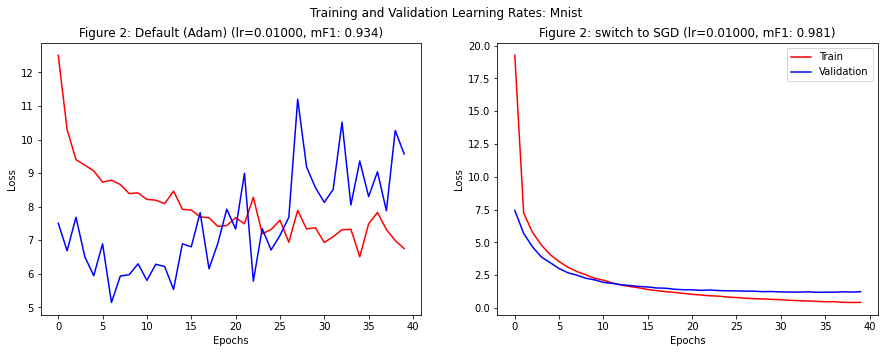

In [7]:
# plot the results
facade.get_grapher().plot([default_res, with_sgd_res])